In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import segyio
import numpy as np
import pandas as pd
import os
import re

#def read_segycube(input_file,x_word=181,y_word=185,il_word=189,xl_word=193,t0_word=109,dt_word=117,nt_word =115,sc_word = 71):

def read_segycube(input_file,x_word=181,y_word=185,il_word=189,xl_word=193,t0_word=109,dt_word=117,nt_word =115,sc_word = 71):
    '''
        Fast read of a SEG-Y file: The file is supposed to store the full 3D volume including dead traces. 
        Trace delay is unique (identical for all traces).
        
        Input:
        -------
        input_file             path of the SEG-Y file (absolute or relative)
        il_word                start byte for IL CDP in trace header
        xl_word                start byte for XL CDP in trace header
        t0_word                start byte for Time/Depth of first trace sample in trace header
        dt_word                start byte for Time sampling (in us) in trace header
        nt_word                start byte for #Time samples in trace header
        sc_word                start byte for corrdinate scaler in trace header
        
        Output:
        -------
        geometry               Dictionary with geometry of the SEG-Y file (includes IL,XL,T,X,Y....)
        data                   3D-Array with read amplitudes              
    
    '''
    
    #Init
    geometry = dict()
    
    #Opens file
    with segyio.open(input_file,
                     iline=il_word,
                     xline=xl_word,
                     mode='r') as f:
        
        # IL / XL indexes
        geometry['il'] = f.ilines
        geometry['nil'] = len(geometry['il'])
        geometry['xl'] = f.xlines
        geometry['nxl'] = len(geometry['xl'])
        geometry['ntrace'] = geometry['nil'] * geometry['nxl']
        geometry['mesh'] = np.meshgrid(geometry['xl'],geometry['il'])
        
        # Vertical dimension
        t0 = f.header[0][t0_word]
        dt = f.header[0][dt_word]/1000
        nt = f.header[0][nt_word]
        
        geometry['t'] = np.arange(t0,t0+nt*dt,dt) 
        geometry['nt'] = nt
        geometry['dt'] = dt

        
        # Grids for X/Y coordinates    
        scaling = f.header[0][sc_word] if f.header[0][sc_word] > 0 else -1/f.header[0][sc_word]
        geometry['x'] = np.array([f.header[i][x_word] * scaling 
                                  for i in range(geometry['ntrace'])]).reshape(geometry['nil'],
                                                                               geometry['nxl'])
        geometry['y'] = np.array([f.header[i][y_word] * scaling 
                                  for i in range(geometry['ntrace'])]).reshape(geometry['nil'],
                                                                               geometry['nxl'])
        # Grid orientation and rotation angle, anti-clockwise from (East)
        if geometry['x'][0,-1]==geometry['x'][0,0]:
            geometry['angle'] = angle = np.pi/2
        else:
            geometry['angle'] = np.arctan((geometry['y'][0,-1]-geometry['y'][0,0])/
                                          (geometry['x'][0,-1]-geometry['x'][0,0]))
        geometry['direct'] = np.sign(np.cross([geometry['x'][0,-1]-geometry['x'][0,0],
                                   geometry['y'][0,-1]-geometry['y'][0,0]],
                                  [geometry['x'][-1,0]-geometry['x'][0,0],
                                   geometry['y'][-1,0]-geometry['y'][0,0]]))  
        
        # Sampling (in m) in each direction il and xl

        geometry['nxl'] = len(geometry['xl'])
        geometry['ntrace'] = geometry['nil'] * geometry['nxl']
        geometry['mesh'] = np.meshgrid(geometry['xl'],geometry['il'])
        
        # Vertical dimension
        t0 = f.header[0][t0_word]
        dt = f.header[0][dt_word]/1000
        nt = f.header[0][nt_word]
        
        geometry['t'] = np.arange(t0,t0+nt*dt,dt) 
        geometry['nt'] = nt
        geometry['dt'] = dt

        
        # Grids for X/Y coordinates    
        scaling = f.header[0][sc_word] if f.header[0][sc_word] > 0 else -1/f.header[0][sc_word]
        geometry['x'] = np.array([f.header[i][x_word] * scaling 
                                  for i in range(geometry['ntrace'])]).reshape(geometry['nil'],
                                                                               geometry['nxl'])
        geometry['y'] = np.array([f.header[i][y_word] * scaling 
                                  for i in range(geometry['ntrace'])]).reshape(geometry['nil'],
                                                                               geometry['nxl'])
        # Grid orientation and rotation angle, anti-clockwise from (East)
        if geometry['x'][0,-1]==geometry['x'][0,0]:
            geometry['angle'] = angle = np.pi/2
        else:
            geometry['angle'] = np.arctan((geometry['y'][0,-1]-geometry['y'][0,0])/
                                          (geometry['x'][0,-1]-geometry['x'][0,0]))
        geometry['direct'] = np.sign(np.cross([geometry['x'][0,-1]-geometry['x'][0,0],
                                   geometry['y'][0,-1]-geometry['y'][0,0]],
                                  [geometry['x'][-1,0]-geometry['x'][0,0],
                                   geometry['y'][-1,0]-geometry['y'][0,0]]))  
        
        # # Sampling (in m) in each direction il and xl
        # geometry['dxl_m'] = np.sqrt((geometry['x'][0,1]-geometry['x'][0,0])**2+
        #                             (geometry['y'][0,1]-geometry['y'][0,0])**2)
        # geometry['dil_m'] = np.sqrt((geometry['x'][1,0]-geometry['x'][0,0])**2+
        #                             (geometry['y'][1,0]-geometry['y'][0,0])**2)
        
        # Reads data
        # Reads data
        data = segyio.tools.cube(f)
        
    return geometry,data


In [47]:
ROOT = os.path.abspath("../../")
DATADIR = os.path.join(ROOT, "DATA")
RAWDIR = os.path.join(DATADIR, "raw", "Data")
DRILLDIR = os.path.join(DATADIR, "raw", "Data", "DrillCam_FieldData")

In [4]:
data.shape

NameError: name 'data' is not defined

In [5]:
input_file = os.path.join(RAWDIR, "modeling_drillcam+GathAP-Z.sgy")
with segyio.open(input_file, ignore_geometry=True) as f:
    print(f.header)

FileNotFoundError: [Errno 2] No such file or directory

In [48]:
input_file = os.path.join("generated_gt_images.sgy")
f = segyio.open(input_file, ignore_geometry=True)
raw = f.trace.raw[:]

In [49]:
input_file = os.path.join(RAWDIR, "modeling_drillcam+GathAP-Z.sgy")

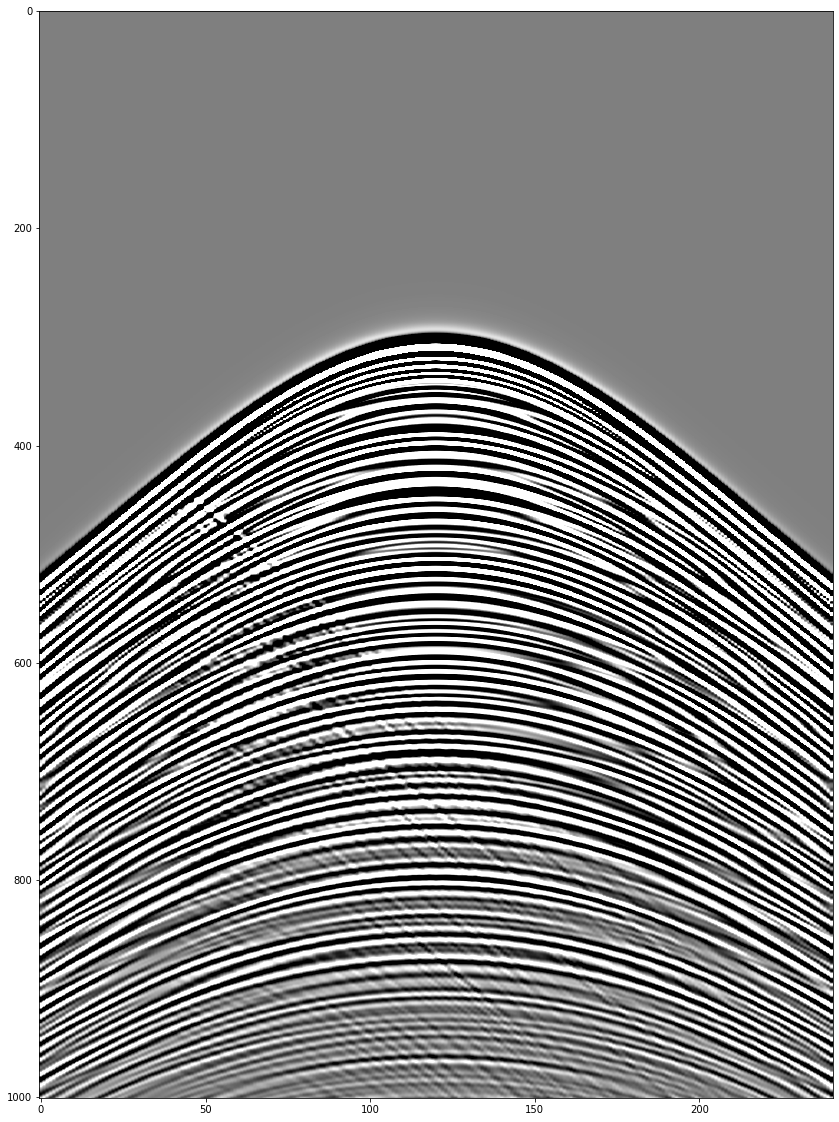

In [50]:
plt.figure(figsize=[20,20])
wx = 241
processed=raw.reshape(-1,wx, 1001)
plt.imshow(processed[2000].T, aspect=0.33, cmap='gray', vmin=-0.1, vmax=0.1)

In [52]:
processed.shape

(2121, 241, 1001)

In [53]:
plt.figure(figsize=[20,20])
plt.imshow(data[0,0].T, aspect=0.1, cmap='gray', vmin=-0.1, vmax=0.1)
plt.show()

NameError: name 'data' is not defined

<Figure size 1440x1440 with 0 Axes>

In [12]:
import pandas as pd
col_names = ["XREC",
"YREC",
"ELEV_REC",
"YSHOT",
"XSHOT",
"ELEV_SHOT",
"OFFSET_SH_",
"DATA_FIRST"]
# raw_labels = pd.read_csv(os.path.join(RAWDIR, 'labels.csv'), skiprows=8, names=col_names)
# raw_labels

In [12]:
np.loadtxt(os.path.join(RAWDIR, "Trace_HEADERS_with_Traveltimes.asc")).shape

FileNotFoundError: /home/makam0a/DATA/raw/Data/Trace_HEADERS_with_Traveltimes.asc not found.

In [13]:
arr = np.loadtxt(os.path.join("Trace_HEADERS_with_Traveltimes.asc"))
df = pd.DataFrame(data=arr, index=None, columns=col_names)

In [14]:
iz = df.OFFSET_SH_.unique()
iy = df.ELEV_SHOT.unique()

In [38]:
fbp = np.array(df.DATA_FIRST).reshape(len(iy), len(iz))
fbp = fbp/2021*1001
fbp.max()

540.2269708065314

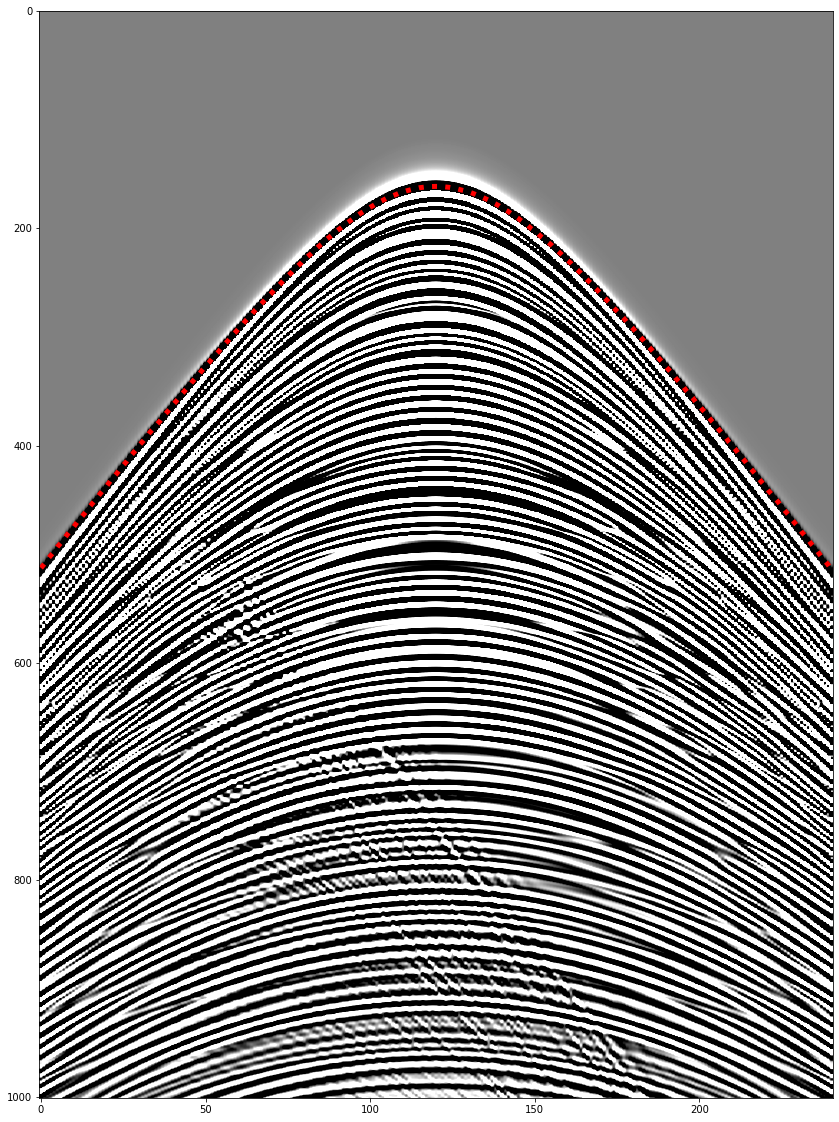

In [40]:
idx = 1000
plt.figure(figsize=[20,20])
plt.plot(fbp[idx,:], lw=5, linestyle='dotted', color='r')
plt.imshow(processed[idx].T, aspect=0.33, cmap='gray', vmin=-0.1, vmax=0.1)
plt.show()

In [41]:
line = fbp[idx,:]
line.shape

(241,)

In [42]:
from skimage.color import label2rgb

In [43]:
processed[idx].shape

(241, 1001)

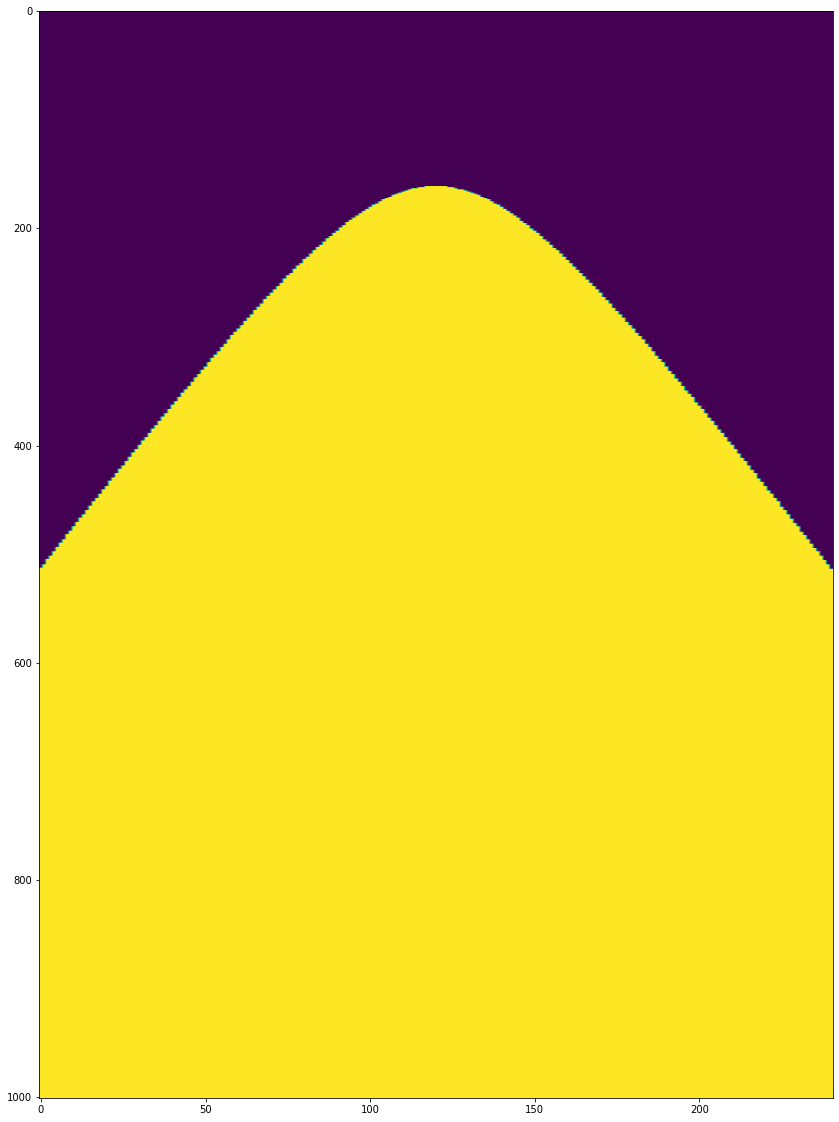

In [44]:
arr = np.repeat(np.arange(1001),241).reshape(-1,241)
labels = line < arr
plt.figure(figsize=[20,20])
plt.imshow(labels, aspect=0.33)
plt.show()

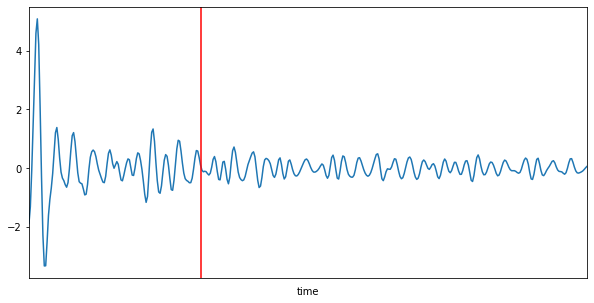

In [30]:
plt.figure(figsize=[10,5])
plt.plot(processed[idx].T[:,50])
plt.axvline(523, c='r')
plt.xlim(400,800)
plt.xticks([])
plt.xlabel('time')
plt.show()

In [20]:
processed.mean()

5.7108904e-05

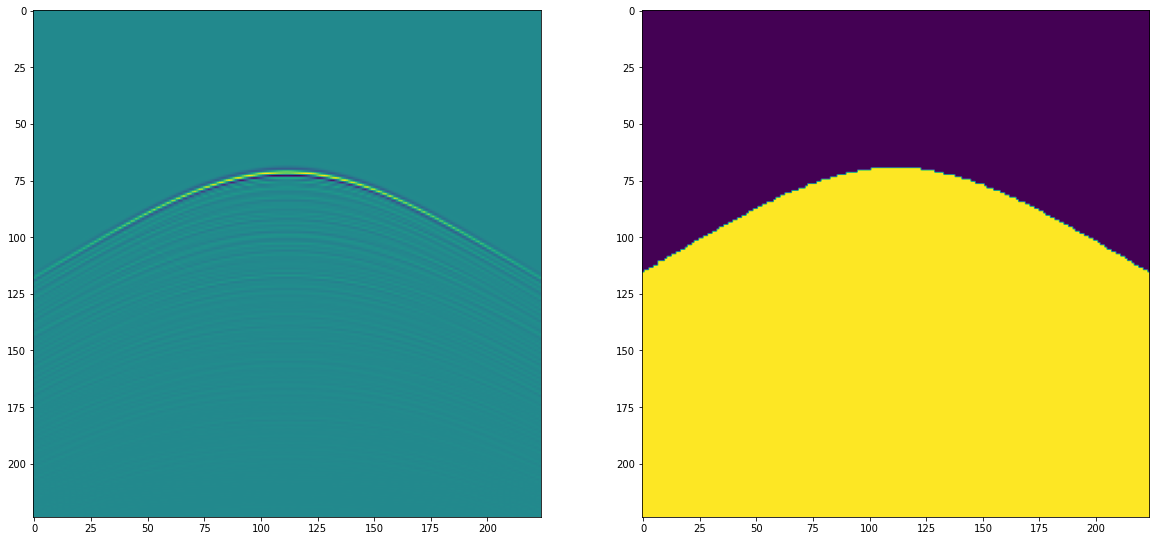

In [44]:
def get_labels(line):
    arr = np.repeat(np.arange(1001),241).reshape(-1,241)
    labels = line < arr
    return labels

ampl = 4

target_size = (224, 224)
for i in range(len(processed))[20:]:
    img = processed[i]
    transformed_img= np.clip(transform.resize(img, target_size, preserve_range=True, anti_aliasing=True),-ampl,ampl)/ampl
    line = fbp[i]
    print(i, "max = ", transformed_img.max(), "min = ", transformed_img.min(), "mean = ", transformed_img.mean())
    label = get_labels(line)
    label = transform.resize(label, target_size, preserve_range=True).astype(int)
    clear_output(wait=8)
    plt.figure(figsize=[20,10])
    plt.subplot(121)
    plt.imshow(transformed_img.T)
    plt.subplot(122)
    plt.imshow(label)
    np.save(f'normalized/input/{i}.npy',transformed_img.T)
    np.save(f'normalized/target/{i}.npy',label)
    plt.show()

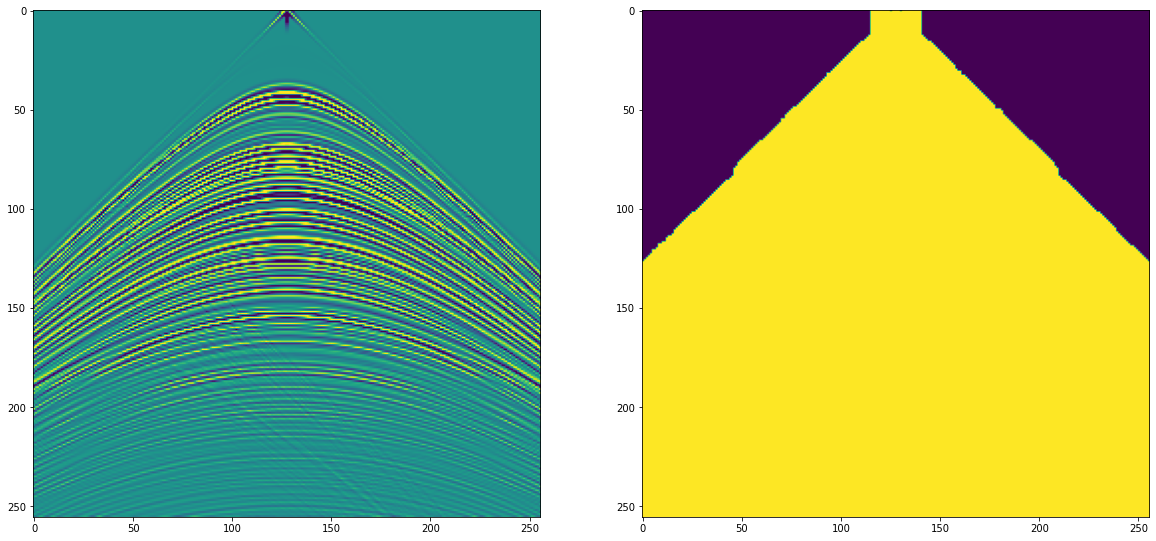

In [81]:
plt.figure(figsize=[20,10])
plt.subplot(121)
plt.imshow(np.load(f'data/input/{0}.npy'))
plt.subplot(122)
plt.imshow(np.load(f'data/target/{0}.npy'))
plt.show()

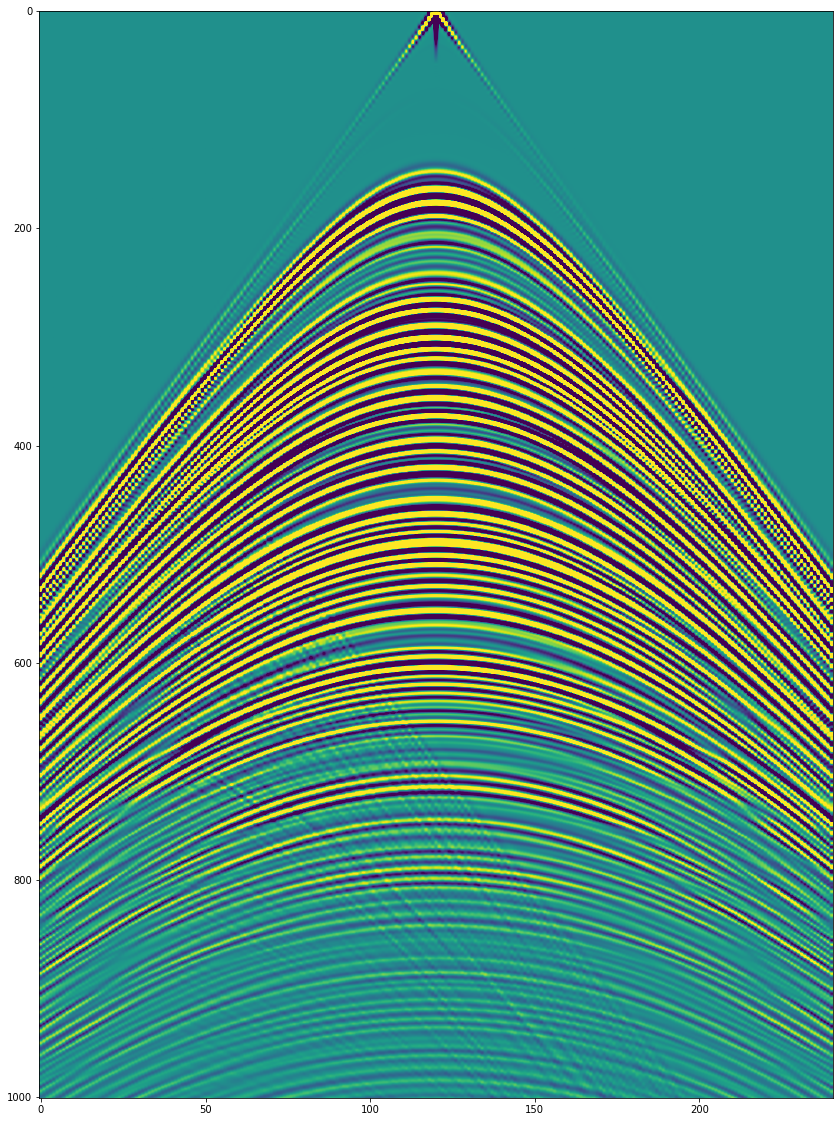

In [48]:
plt.figure(figsize=[20,20])
plt.imshow(img.T,aspect=0.33, vmin=-1, vmax=1)
plt.show()

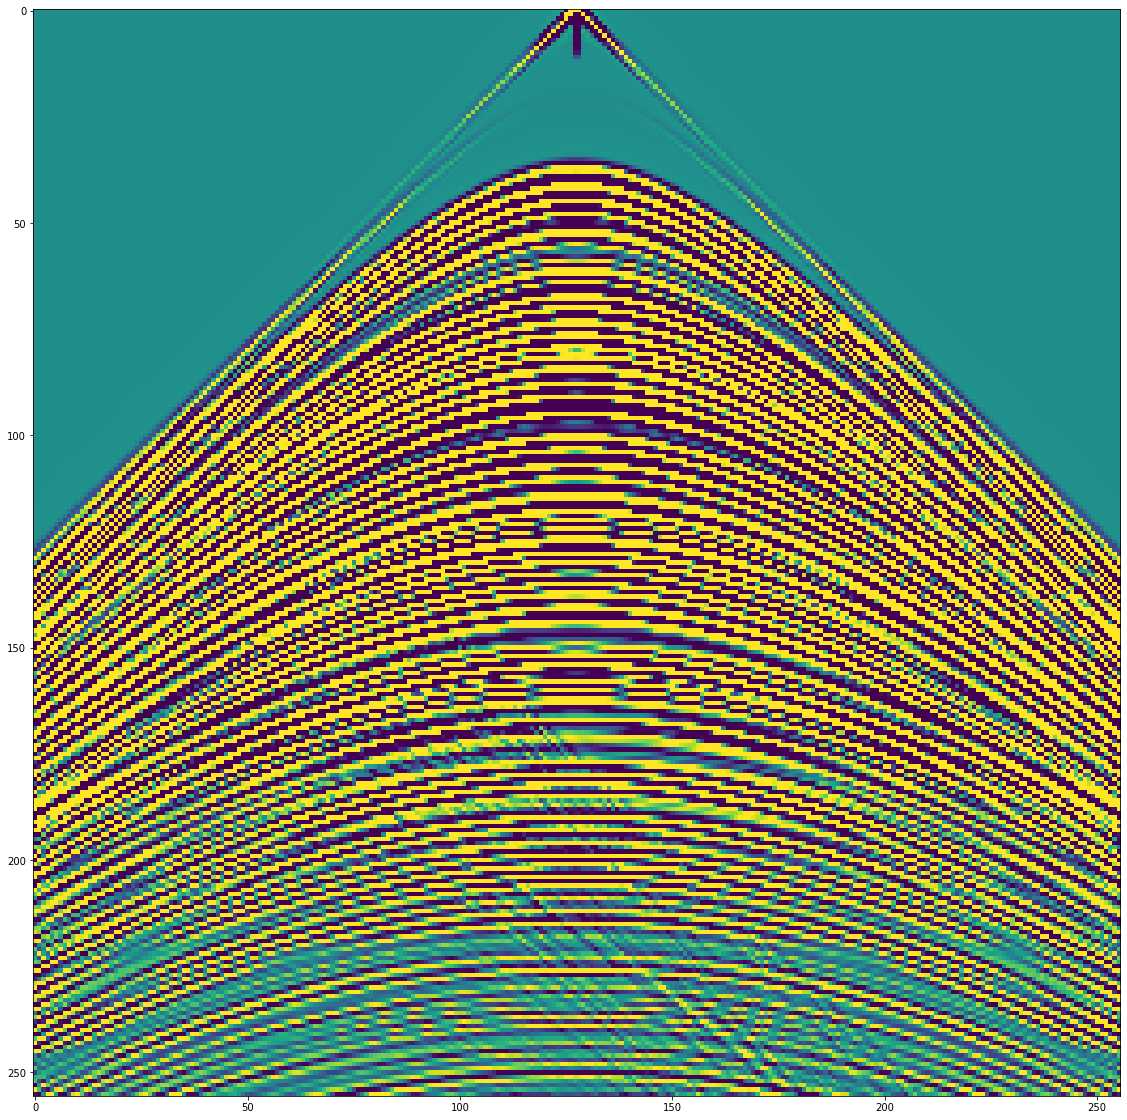

In [44]:
plt.figure(figsize=[20,20])
plt.imshow(transformed_img.T, vmin=-0.2, vmax=0.2)
plt.show()

In [32]:
from IPython.display import clear_output

In [33]:
from skimage.color import label2rgb

In [34]:
from skimage import transform

In [29]:
np.random.normal?